In [1]:
import tikz as tz
import random
from randresist import getRandomResistor

<IPython.core.display.Javascript object>

In [125]:
minVal='minVal'
maxVal='maxVal'
fmt='fmt'
name='name'
symbol='symbol'
value='value'

componentList = [{name:'resistor', symbol:'R', minVal:1, maxVal:18, fmt:r"{:3.1f}<\ohm>"},
                {name:'Vsrc',symbol:'V', minVal:5, maxVal:15, fmt:"{:3.1f}"},
                {name:'Isrc',symbol:'I', minVal:1, maxVal:8, fmt:"{:3.1f}"},
                {name:'wire',symbol:'--'}]

pDict = {'R':0.5, 'V':0.05, 'I':0.05, '--':0.2}

cDict = {c[symbol]:c for c in componentList}
cDict['']={}

def randomElement(pDict=pDict):
    """
    return random key using 
    """
    element = random.choices(*list(zip(*pDict.items())))[0]
    comp = cDict[element]
    if element == 'R':
        val = comp[fmt].format(getRandomResistor(comp[minVal],comp[maxVal]))
    elif element == '--':
        val = ''
    else:
        val = comp[fmt].format(random.uniform(comp[minVal],comp[maxVal]))
    return {symbol:element, value: val }

def grid(n, m, components=cDict, weights=pDict):
    """
    generate a grid with n (rows) x m (columns) meshes
    """
    cells = []
    for i in range(n+1):
        row = []
        cells.append(row)
        for j in range(m+1):
            ruComponent = randomElement()
            rlComponent = randomElement()
            if i==n:
                # last row
                if j==m:
                    # last col
                    row.append({})
                else:
                    row.append({'l':ruComponent})
            elif j==m:
                # last col, not last row
                row.append({'u':rlComponent})
            else:
                row.append({'l':rlComponent,'u':ruComponent})
            

    return cells

In [126]:
def drawElement(pic, i, j, ip, jp, element):
    if element[symbol] in ['V','I','R']:
        pic.draw((i,j),tz.lineto((ip,jp),op='to [{}, l^={}]'.format(element[symbol],element[value])))
    else:
        pic.draw((i,j),element[symbol],(ip,jp))

def createCircuitGrid(grid,scale=2):
    """
    grid is a rectangular array of circuit elements
    """
    pic = tz.Picture(scale=scale, tempdir='.', cache=False)
    pic.add_preamble(r'\usepackage[american, siunitx]{circuitikz}')

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            uelement = grid[i][j].get('u')
            lelement = grid[i][j].get('l')
            if uelement:
                drawElement(pic, i, j, i+1, j, uelement)
            if lelement:
                drawElement(pic, i, j, i, j+1, lelement)
    return pic
    


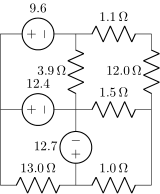

In [132]:
pic = createCircuitGrid(grid(2,2))
pic.demo()